# Lab 3 - drzewa decyzyjne i lasy losowe

Drzewa decyzyjne są klasyfikatorami dodatkowo ilustrującymi proces decyzyjny w sposób graficzny.

## Przykładowe drzewo decyzyjne

Poniższe drzewo decyzyjne ilustruje proces podejmowania decyzji odnośnie gry w tenisa w zależności od warunków pogodowych.

![model_learning](img/id3_tennis.png)

1. Jaką decyzję podejmiemy przy słonecznej pogodzie i wysokiej wilgotności powietrza?
2. Jaką decyzję podejmiemy przy pogodzie pochmurnej i niskiej wilgotności powietrza?

## Uczenie drzewa decyzyjnego

Uczenie (formowanie) drzewa decyzyjnego odbywa się na podstawie danych w formie systemu decyzyjnego.

Metodę uczenia drzewa decyzyjnego można uogólnić następującymi krokami:
- znalezienie atrybutu w systemie treningowym atrybutu niosącego najwięcej informacji, a następnie podzielenie systemu na kategorie według tego atrybutu.
- powtarzanie procesu do osiągnięcia pewnego założonego progu

Do podziału systemu decyzyjnego na podkategorie można wykorzystać następujące metryki:
- Zysk informacyjny
- Niejednorodność Giniego

### Zysk informacyjny

Zysk informacyjny jest miarą zgodności badanego atrybutu z celem.

Miarę zysku informacyjnego można wyrazić wzorem:

$$Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)$$

gdzie:
- S oznacza zbiór obiektów w systemie decyzyjnym
- A oznacza badany atrybut
- $$ Entropy(S) = \sum_{i=1}^n -p_i log_2(p_i) $$, gdzie:
    - $$n$$ oznacza liczbę klas decyzyjnych
    - $$p_i$$ oznacza liczbę obiektów w i-tej klasie decyzyjnej

### Niejednorodność Giniego

Niejednorodność Giniego jest miarą probabilistyczną definiującą prawdopodobieństwo przydzielenia błędnej decyzji za pomocą
badanego atrybutu, co można wyrazić następującym wzorem:

$$I_{G}(A) = 1 - \sum_{i=1}^n p(A_i)^2$$

gdzie:
- f oznacza badany atrybut
- n oznacza liczbę wartości w badanym atrybucie
- $$p(f_i)$$ oznacza prawdopodobieństwo wystąpienia wartości badanego atrybutu w i-tej klasie decyzyjnej

Podczas wyznaczania podziału systemu decyzyjnego należy wybrać atrybut, dla którego wartośc zysku informacyjnego jest
największa lub wartość niejednorodności Giniego jest najmniejsza.

## Przykład uczenia drzewa decyzyjnego

Rozważmy następujący system decyzyjny obrazujący cele wycieczek w Tatrach pewnego turysty A:

| LP | pogoda     | sezon letni | pora dnia  | cel wycieczki |
| -- | ---------- | ----------- | ---------- | ------------- |
| 1  | słonecznie | tak         | rano       | szczyt        |
| 2  | słonecznie | nie         | rano       | dolina        |
| 3  | wietrznie  | tak         | rano       | szczyt        |
| 4  | deszczowo  | tak         | popołudnie | szczyt        |
| 5  | deszczowo  | nie         | rano       | Krupówki      |
| 6  | deszczowo  | tak         | rano       | szczyt        |
| 7  | wietrznie  | nie         | popołudnie | szczyt        |
| 8  | wietrznie  | nie         | rano       | Morskie Oko   |
| 9  | wietrznie  | tak         | rano       | szczyt        |
| 10 | słonecznie | nie         | rano       | dolina        |

Na podstawie tej bazy wiedzy można zbudować drzewo decyzyjne obrazujace schemat podejmowania decyzji przez turystę A.

Pierwszym krokiem budowy drzewa decyzyjnego będzie wyznaczenie atrybutu zachowującego największy zysk informacyjny:

$$ Entropy(S) = -p(szczyt) log_2 p(szczyt) - p(dolina) log_2 p(dolina) - p(Morskie Oko) log_2 p(Morskie Oko) - p(Krupówki) log_2 p(Krupówki) = $$
$$ = -\frac{6}{10} log_2 \frac{6}{10} - \frac{2}{10} log_2 \frac{2}{10} - \frac{1}{10} log_2 \frac{1}{10} - \frac{1}{10} log_2 \frac{1}{10} = $$
$$ = -\frac{6}{10} * -0.737 - \frac{2}{10} * -2.322 - \frac{1}{10} * -3.322 - \frac{1}{10} * -3.322 = $$
$$ = 0.4422 + 0.4644 + 0.3322 + 0.3322 = 1.571 $$

$$ Gain(S, Pogoda) = 1.571 - \frac{|S_{slonecznie}|}{10} Entropy(S_{slonecznie}) - \frac{|S_{wietrznie}|}{10} Entropy(S_{wietrznie}) - \frac{|S_{deszczowo}|}{10} Entropy(S_{deszczowo}) = $$
$$ = 1.571 - 0.3 * 0.918 - 0.4 * 0.81125 - 0.3 * 0.918 = 0.70 $$

$$ Gain(S, sezon letni) = 0.61 $$

$$ Gain(S, pora dnia) = 0.2816 $$

Zatem korzeniem drzewa zostanie atrybut pogoda i od tego węzła należy wyprowadzić tyle krawędzi ile jest wartości w atrybucie:

![root](img/tatry_root.png)

Po utworzeniu korzenia drzewa należy przyjrzeć się klasom decyzyjnym przypisanym wartościom atrybutu $$S_{slonecznie}$$.
Są to klasy {szczyt, dolina}, zatem krawędź $$S_{slonecznie}$$ nie zakończy się liściem drzewa decyzyjnego.
W tym celu należy wybrać kolejny atrybut, który rozdzieli obiekty należące do tego podzbioru.

Podobnie sytuacja wygląda w przypadku podzbioru $$S_{wietrznie}$$.

W tym celu należy wyznaczyć zysk informacyjny dla obiektów znajdujących się w podzbiorach gałęzi oraz atrybutów z wyjątkiem użytego przy budowie korzenia drzewa decyzyjnego.
Przy wyznaczaniu zysków informacyjnych należy brać pod uwagę tylko te atrybuty, które nie zostały wykorzystane w podziale wyższych poziomów drzewa decyzyjnego.

Rozważmy podzbiór obiektów dla odgałęzienia $$S_{slonecznie}$$

| LP | pogoda     | sezon letni | pora dnia  | cel wycieczki |
| -- | ---------- | ----------- | ---------- | ------------- |
| 1  | słonecznie | tak         | rano       | szczyt        |
| 2  | słonecznie | nie         | rano       | dolina        |
| 10 | słonecznie | nie         | rano       | dolina        |

$$ Entropy(S_{slonecznie}) = 0.918 $$
$$ Gain(S_{slonecznie}, sezon letni) = 0.918 - \frac{|S_{tak}|}{|S|} Entropy(S_{tak}) - \frac{|S_{nie}|}{|S|} Entropy(S_{nie}) = $$
$$ 0.918 - \frac{1}{3} * 0 - \frac{2}{3} * 0 = 0.918 $$

$$ Gain(S_{slonecznie}, pora dnia) = 0 $$

Zatem do podziału podzbioru $$ S_{slonecznie} $$ użyjemy atrybutu "sezon letni", który zachowuje większy zysk informacyjny.
Atrybut "pora dnia" dla tego podzbioru nie wnosi żadnej wartości.

Drzewo decyzyjne po podziale podzbioru $$ S_{slonecznie} $$ będzie wyglądało następująco:

![node_2](img/tatry_node_2.png)

Powtarzając powyższy schemat można zbudować pełne drzewo decyzyjne, które dla przedstawionego systemu decyzyjnego prezentuje się następująco:

![full_tree_tatras](img/tatry_full.png)

### Zadanie

Zbudować drzewo decyzyjne na podstawie następującego systemu decyzyjnego:

| Outlook  | Temp | Humidity | Windy | Play |
| -------- | ---- | -------- | ----- | ---- |
| Rainy    | Hot  | High     | f     | no   |
| Rainy	   | Hot  | High     | t	 | no   |
| Overcast | Hot  | High	 | f     | yes  |
| Sunny    | Mild |	High     | f     | yes  |
| Sunny    | Cool | Normal   | f     | yes  |
| Sunny    | Cool | Normal   | t     | no   |
| Overcast | Cool | Normal   | t     | yes  |
| Rainy    | Mild |	High     | f     | no   |
| Rainy    | Cool |	Normal   | f	 | yes  |
| Sunny    | Mild |	Normal	 | f     | yes  |
| Rainy    | Mild |	Normal	 | t	 | yes  |
| Overcast | Mild | High     | t     | yes  |
| Overcast | Hot  | Normal   | f     | yes  |
| Sunny    | Mild | High     | t     | no   |

Do narysowania drzewa można wykorzystać narzędzie https://app.diagrams.net

## Precyzja i czułość

Miary precyzji i czułości pozwalają na określenie jak klasyfikator radzi sobie z trafnością przydzielanych decyzji, co można wyrazić następującymi wzorami:

$$Precision = \frac{TP}{TP + FP}$$
$$Sensitivity = \frac{TP}{TP + FN}$$
$$Accuracy = \frac{TP + TN}{Total}$$

gdzie:
- TP oznacza liczbę obiektów poprawnie sklasyfikowanych jako pozytywne
- TN oznacza liczbę obiektów poprawnie sklasyfikowanych jako negatywne
- FP oznacza liczbę obiektów fałszywie sklasyfikowanych jako pozytywne
- FN oznacza liczbę obiektów fałszywie sklasyfikowanych jako negatywne

Za pomocą precyzji można określić trafność klasyfikacji, czyli odsetek wszystkich pozytywnych obiektów, które zostały poprawnie sklasyfikowane.
Czułość służy do określania trafności wyszukiwania wszystkich pozytywnych obiektów, czyli odsetka obiektów sklasyfikowanych jako pozytywne spośród wszystkich pozytywnych obiektów.

## Drzewo decyzyjne w pakiecie Scikit learn

Pakiet Scikit learn udostępnia implementacje drzewa decyzyjnego zarówno jako predyktora w procesie klasyfikacji, jak i regresji.

### Klasyfikacja przy użyciu drzewa decyzyjnego

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

Wczytanie systemu decyzyjnego

In [3]:
df = pd.read_csv('data/data-samples.csv')

df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


Utworzenie obiektu klasyfikatora

In [7]:
clf = DecisionTreeClassifier()

5-krotna walidacja krzyżowa dokładności modelu drzewa decyzyjnego

In [8]:
cross_val_score(clf, df.iloc[:, 0:2], df.iloc[:, 2], cv=5)


array([0.96482412, 0.90954774, 0.91457286, 0.90452261, 0.92964824])

### Regresja przy użyciu drzewa decyzyjnego

W celu zbudowania regresora metodą drzewa decyzyjnego należy utworzyć obiekt klasy DecisionTreeRegressor

In [9]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

## Zadania

1. Korzystając ze źródła http://archive.ics.uci.edu/ml/datasets.php wybrać dowolny system decyzyjny z binarnym atrybutem decyzyjnym, a następnie dokonać
klasyfikacji przy użyciu drzewa decyzyjnego z pakietu Scikit learn. Sprawdzić następujące parametry klasyfikacji za pomocą 5-krotnej walidacji krzyżowej:
    - dokładność
    - precyzja
    - czułość

2. Korzystając ze źródła http://archive.ics.uci.edu/ml/datasets.php wybrać zbiór danych z przeznaczeniem regresyjnym.
Sprawdzić przy użyciu 10-krotnej walidacji krzyżowej MAE modelu na wybranym zbiorze.

## Wizualizacja procesu decyzyjnego przy użyciu drzewa decyzyjnego

Pakiet Scikit learn udostępnia interfejs służący wygodnej wizualizacji drzew decyzyjnych.

### Dane treningowe

In [9]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

iris = datasets.load_iris(as_frame=True)  # zbior danych iris
X = iris.data
y = iris.target

iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Uczenie (formowanie drzewa decyzyjnego)

In [15]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

### Wizualizacja drzewa decyzyjnego

[]

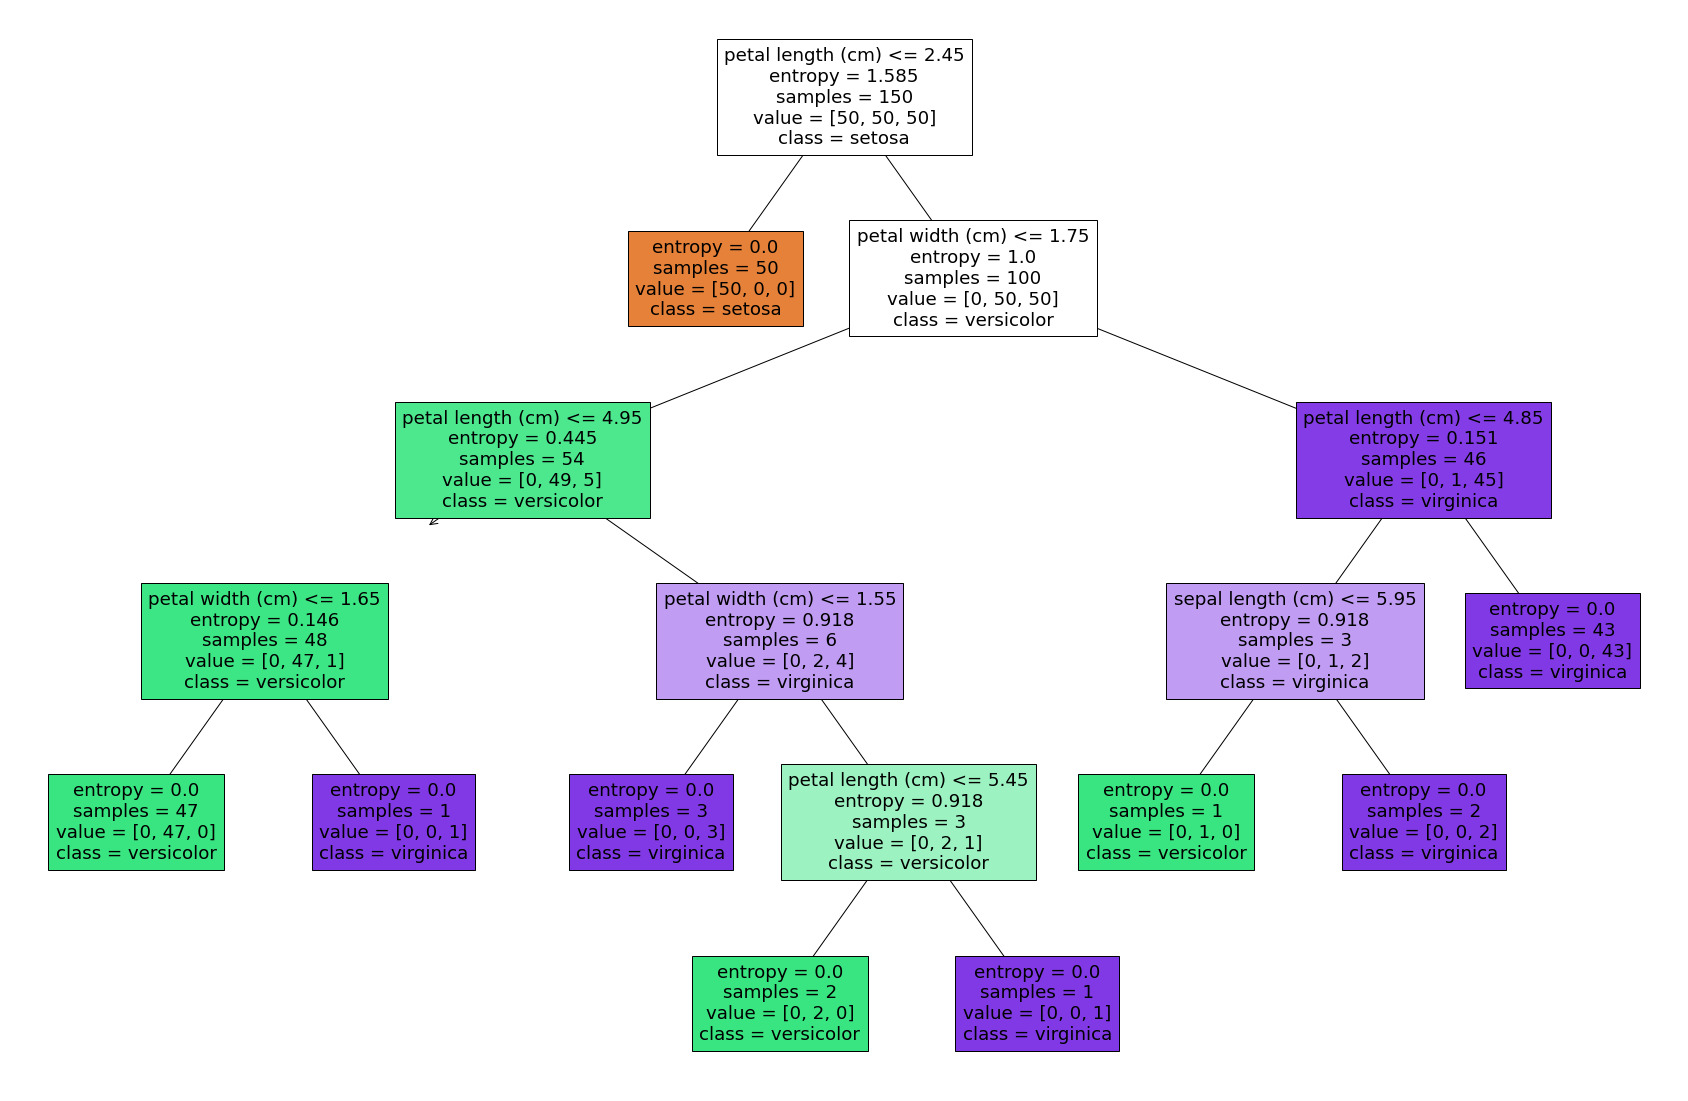

In [16]:
fig = plt.figure(figsize=(30,20))

tree.plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)

plt.plot()

## Zadanie

Zwizualizować przy użyciu pakietu Scikit learn proces decyzyjny turysty A na urlopie w Zakopanem.
Należy zwrócić uwagę na stosowanie wartości liczbowych w atrybutach systemu decyzyjnego, zatem każda wartość
(np. słonecznie, rano, itp.) powinna otrzymać wartość liczbową.

## Lasy losowe i uczenie zespołowe

Las losowy to klasyfikator składający się z drzew decyzyjnych uczony metodą agregacji,
która polega na uczeniu składowych klasyfikatorów za pomocą obiektów pochodzących z systemu decyzyjnego dobieranych
metodą losowania ze zwracaniem. Zatem każde z drzew decyzyjnych wchodzące w skład lasu losowego jest uczone na podstawie
innych obiektów.

Finalna decyzja jest dominantą decyzji podjętych przez składowe klasyfikatory modelu.

### Przykład wykorzystania modelu lasu losowego pochodzącego z pakietu Scikit learn

#### Dane treningowe i testowe

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

#### Uczenie modelu lasu losowego

Stworzymy model lasu losowego składający się z 32 drzew decyzyjnych (hiperparametr n_estimators)

In [ ]:
clf = RandomForestClassifier(n_estimators=32, n_jobs=-1)  # n_jobs=-1 oznacza wykorzystanie wszystkich dostępnych rdzeni
clf.fit(X_train, y_train)

#### Przydzielanie decyzji z wykorzystaniem modelu lasu losowego

In [22]:
prediction = clf.predict([[5., 3.1, 1.2, 0.3]])

prediction

array([0])

### Zadanie

Korzystając ze źródła http://archive.ics.uci.edu/ml/datasets.php wybrać dowolny system decyzyjny , a następnie dokonać
klasyfikacji przy użyciu modelu lasu losowego z pakietu Scikit learn.
Porównać wynik z modelem drzewa decyzyjnego.

### Lasy losowe w ocenie istotności atrybutów systemu decyzyjnego

W wielu przypadkach nieistotne atrybuty (niosące niewielką ilość informacji) mogą wpływać negatywnie na jakość prognoz.
Model lasu losowego umożliwia sprawdzenie istotności każdego z atrybutów poprzez sprawdzenie w jakim stopniu węzły
każdego drzewa decyzyjnego wykorzystujące tę cechę zmniejszają zanieczyszczenie poprzez obliczenie średniej ważonej
gdzie waga każdego węzła odpowiada liczebności powiązanych z nim obiektów z systemu decyzyjnego.

Pakiet Scikit learn umożliwia wygodny interfejs do oceny istotności atrybutów, który można wykorzystać następująco:

In [23]:
for i, f_importance in enumerate(clf.feature_importances_):
    print(f'Atrybut: {iris.feature_names[i]}, istotność: {f_importance}')

Atrybut: sepal length (cm), waga: 0.011587603285713902
Atrybut: sepal width (cm), waga: 0.0
Atrybut: petal length (cm), waga: 0.6570335847127355
Atrybut: petal width (cm), waga: 0.33137881200155045


Dzięki takiemu zabiegowi można wybrać atrybuty z systemu decyzyjnego o największej istotności.

### Zadanie

Zbadać istotność atrybutów z systemu decyzyjnego użytego w poprzednim zadaniu i wybrać empirycznie tylko najbardziej istotne.
Dokonać klasyfikacji metodą lasu losowego, a następnie porównać wyniki z modelem drzewa decyzyjnego, naiwnego klasyfikatora bayesowskiego i modelu knn (z pakietu Scikit learn).

